<a href="https://colab.research.google.com/github/ashukesharwani/paper2/blob/main/Paper2_Rice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression and RandomForest Regression**



In [27]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn
import matplotlib.pyplot as plt
  

plt.rcParams['figure.figsize']=(10.0,7.0)

In [28]:
df=pd.read_excel('/content/Crop Datasets.xlsx')
df

,Year,Area,Production,Yield
0,1950-51,30.81,20.58,668
1,1951-52,29.83,21.30,714
2,1952-53,29.97,22.90,764
3,1953-54,31.29,28.21,902
4,1954-55,30.77,25.22,820
...,...,...,...,...
64,2014-15,44.11,105.48,2391
65,2015-16,43.49,104.40,2400
66,2016-17,43.99,109.69,2494
67,2017-18,43.77,112.75,2576


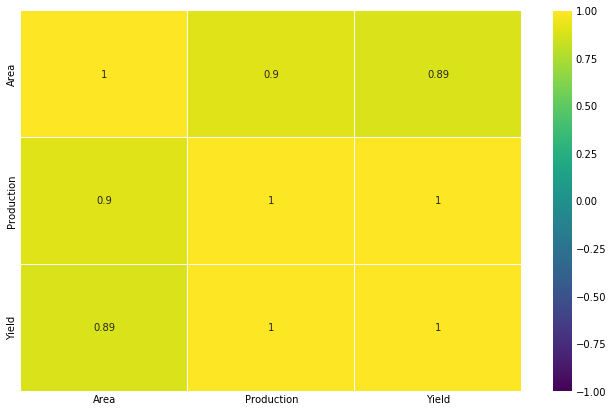

In [29]:
import seaborn as sns
df_kor = df.corr()
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

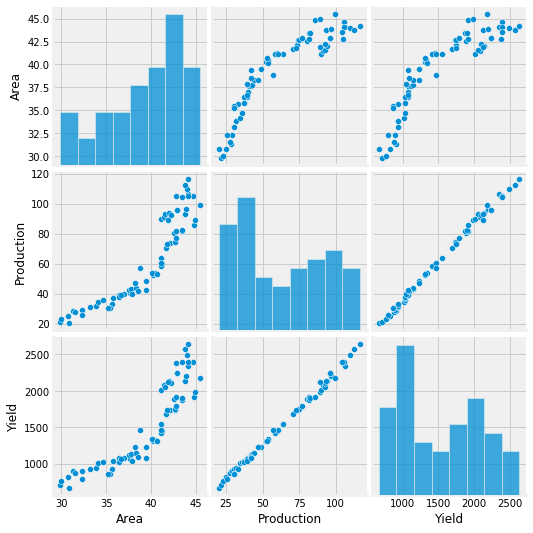

In [30]:
import seaborn
import matplotlib.pyplot as plt
  
seaborn.pairplot(df)
# to show
plt.show()

In [31]:
X=df['Area'].values
Y=df['Production'].values
#total number of values
m=len(X)

#**Linear Regression**

In [32]:
from sklearn.linear_model import LinearRegression

# cannot use Rank 1 matrix in scikit learn
X=X.reshape((m ,1))


#creating Model
reg=LinearRegression()

#fitting traingin data
reg=reg.fit(X, Y)
print("Y-intercept :"  , reg.intercept_)
print("Slope :" , reg.coef_)
print("\n")


#Y prediction
Y_pred=reg.predict(X)
print("Y_Predicted Values : ")
Y_pred

Y-intercept : -173.0137146699802
Slope : [5.99426992]


Y_Predicted Values : 


array([11.66974168,  5.79535715,  6.63455494, 14.54699124, 11.42997088,
       15.92567332, 20.48131846, 20.60120386, 25.81621869, 29.71249415,
       31.57071782, 34.92750898, 40.9217789 , 41.64109129, 45.53736674,
       39.60303952, 38.28430014, 45.41748134, 48.5944444 , 52.85037605,
       52.31089176, 53.32991764, 46.91604883, 56.5068807 , 54.10917273,
       63.64006191, 57.82562009, 68.43547785, 69.63433184, 63.28040572,
       67.65622276, 71.01301392, 56.32705261, 74.18997698, 73.71043538,
       73.59054999, 73.77037808, 59.62390106, 77.12716924, 79.76464801,
       82.88166837, 82.64189757, 77.42688274, 81.98252788, 83.60098076,
       83.78080886, 87.31742811, 87.43731351, 95.52957791, 96.54860379,
       73.53060729, 75.56865906, 76.16808605, 79.10527832, 80.0643615 ,
       89.59525068, 90.19467767, 99.90539495, 78.20613783, 83.90069425,
       83.90069425, 94.75032282, 83.24132456, 91.51341706, 91.39353166,
       87.67708431, 90.67421927, 89.35547988, 91.63330246])

Text(0.5, 1.0, 'Simple Linear Regression line ')

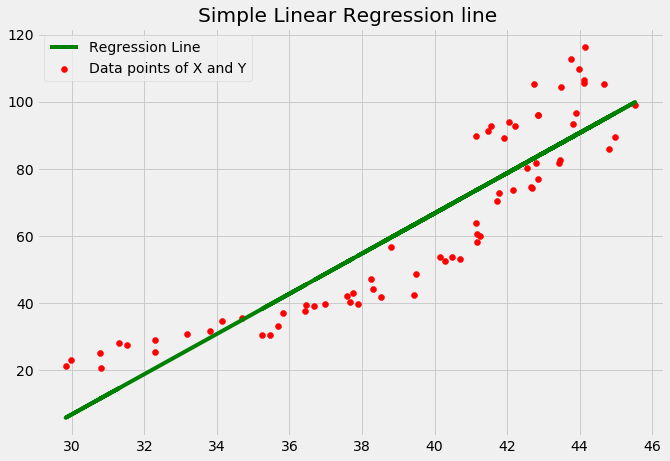

In [33]:
#interception line

plt.style.use('fivethirtyeight')
plt.scatter(X, Y, color = 'red',label="Data points of X and Y")
plt.plot(X,Y_pred, color = 'green',label="Regression Line")
plt.legend()
plt.title("Simple Linear Regression line ")


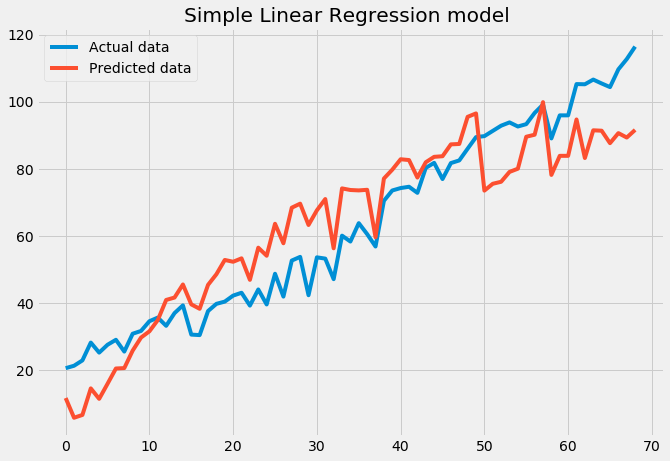

In [34]:
plt.style.use('_classic_test_patch')
plt.plot(Y,label="Actual data")
plt.plot(Y_pred,label="Predicted data")
plt.title("Simple Linear Regression model ")
plt.legend()

In [35]:
#Calculation the Model Performance for Linear Regression

#R_Squared

from sklearn.metrics import r2_score
r2 = r2_score(Y, Y_pred)
print('r2 score for perfect model is', r2)

#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y, Y_pred)
print(f"Mean Squared Error:  {mse}")


#Root mean square error
rmse=np.sqrt(mse)
print(f"Root mean square error:  {rmse}")


#Mean Absolute Error
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(Y, Y_pred)
print(f"Mean Absolute Error:  {mae}")

#Mean Absolute Percentage  Error
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

LR_MAPE= MAPE(Y, Y_pred)
print("Mean Absolute Percentage Error: ",LR_MAPE)

#Teil's U Statistic
def u1(f,y):
    # y = y.reset_index(drop=True).values.flatten()
    # f = f.reset_index(drop=True).values.flatten()
    df = pd.DataFrame({'f_i':f, 'y_i': y})
    df['(f_i - y_i)^2'] = np.square(df['f_i'] - df['y_i'])
    df['y_i^2'] = np.square(df['y_i'])
    df['f_i^2'] = np.square(df['f_i'])
    return (np.sqrt(np.mean(df['(f_i - y_i)^2'])))/(np.sqrt(np.mean(df['y_i^2']))+np.sqrt(np.mean(df['f_i^2'])))

U1= u1(Y_pred,Y)
print("Theil's U1 Statistic: ",U1)

def u2(f,y):
    # y = y.reset_index(drop=True).values.flatten()
    # f = f.reset_index(drop=True).values.flatten()
    df = pd.DataFrame({'f_i+1':f, 'y_i+1': y})
    df['y_i'] = df['y_i+1'].shift(periods=1)
    df['numerator'] = np.square((df['f_i+1'] - df['y_i+1']) / df['y_i'])
    df['denominator'] = np.square((df['y_i+1'] - df['y_i']) / df['y_i'])
    df.dropna(inplace=True)
    return np.sqrt(np.sum(df['numerator'])/np.sum(df['denominator']))

U2= u2(Y_pred,Y)
print("Theil's U2 Statistic: ",U2)

r2 score for perfect model is 0.8180514145006739
Mean Squared Error:  146.31694215040858
Root mean square error:  12.09615402309381
Mean Absolute Error:  10.756380287527183
Mean Absolute Percentage Error:  20.755592458891766
Theil's U1 Statistic:  0.08792808942922352
Theil's U2 Statistic:  2.399210076306699


# **RandomForest Regression**

In [36]:
X_R=X
Y_R=Y
from sklearn.ensemble import RandomForestRegressor # for building the model

# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor() #n_estimators = 10, random_state = 0

# Fitting the Random Forest Regression model to the data
model.fit(X_R, Y_R)

# Predicting the target values of the test set
Y_prediction = model.predict(X_R)
Y_prediction



array([ 22.6462,  22.0205,  22.7885,  27.4012,  24.6878,  27.1022,
        28.0891,  26.8255,  30.5563,  32.4759,  33.6784,  34.9008,
        34.0721,  35.626 ,  38.8801,  31.6361,  31.0627,  38.1491,
        39.5784,  41.2218,  41.8622,  42.357 ,  39.0789,  44.6404,
        40.7194,  48.1801,  43.1292,  53.7097,  54.2313,  45.4238,
        54.1225,  57.542 ,  45.807 ,  61.4086,  61.8102,  70.3455,
        62.7648,  52.7151,  73.5699,  79.4441,  75.8706,  76.0042,
        74.323 ,  78.9074,  82.1595,  84.054 ,  85.6621,  85.9623,
        93.9741,  90.516 ,  78.6495,  87.7322,  89.5808,  87.9151,
        87.2669,  98.1123,  99.4943,  95.1576,  84.1452,  94.1187,
        94.1187,  98.7916,  95.6787, 107.12  , 106.6444,  96.3202,
       106.0919, 105.6675, 112.3244])

Text(0.5, 1.0, 'RandomForest Regression line')

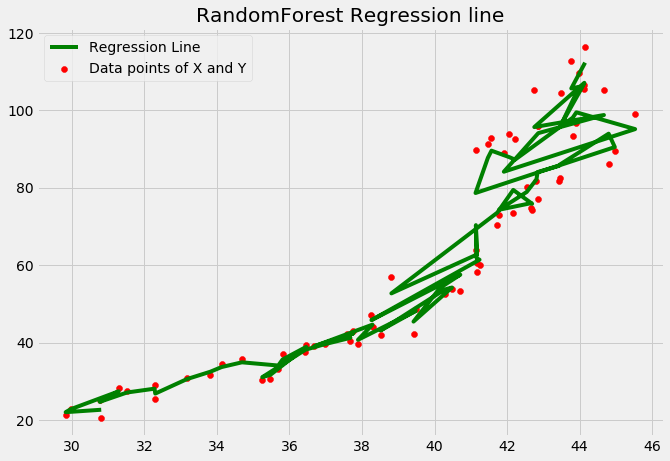

In [37]:
#interception line

plt.style.use('fivethirtyeight')
plt.scatter(X_R, Y_R, color = 'red',label="Data points of X and Y")
plt.plot(X_R,Y_prediction, color = 'green',label="Regression Line")
plt.legend()
plt.title("RandomForest Regression line")

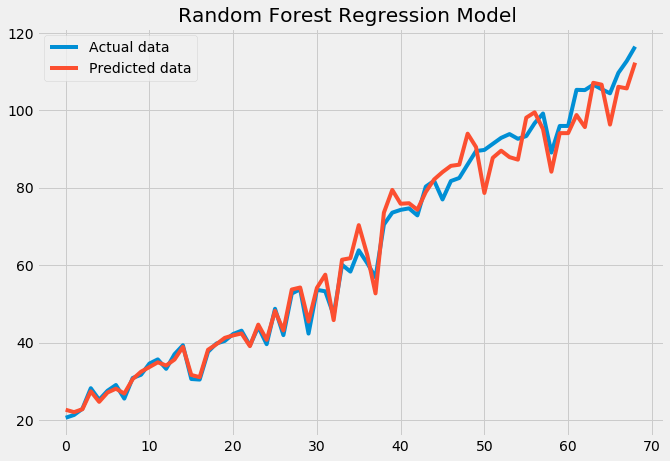

In [38]:
plt.style.use('_classic_test_patch')
plt.plot(Y_R,label="Actual data")
plt.plot(Y_prediction,label="Predicted data")
plt.title("Random Forest Regression Model ")
plt.legend()

In [39]:
#Calculation the Model Performance for Linear Regression

#R_Squared

from sklearn.metrics import r2_score
r2 = r2_score(Y_R, Y_prediction)
print('r2 score for perfect model is', r2)

#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse_R=mean_squared_error(Y_R, Y_prediction)
print(f"Mean Squared Error:  {mse_R}")


#Root mean square error
rmse_R=np.sqrt(mse_R)
print(f"Root mean square error:  {rmse_R}")


#Mean Absolute Error
from sklearn.metrics import mean_absolute_error 
mae_R = mean_absolute_error(Y_R, Y_prediction)
print(f"Mean Absolute Error:  {mae_R}")

#Mean Absolute Percentage  Error
def MAPE(Y_actual,Y_Predicted):
    mape_R = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape_R

LR_MAPE= MAPE(Y_R, Y_prediction)
print("Mean Absolute Percentage Error: ",LR_MAPE)

#Teil's U Statistic
def u1(f,y):
    # y = y.reset_index(drop=True).values.flatten()
    # f = f.reset_index(drop=True).values.flatten()
    df = pd.DataFrame({'f_i':f, 'y_i': y})
    df['(f_i - y_i)^2'] = np.square(df['f_i'] - df['y_i'])
    df['y_i^2'] = np.square(df['y_i'])
    df['f_i^2'] = np.square(df['f_i'])
    return (np.sqrt(np.mean(df['(f_i - y_i)^2'])))/(np.sqrt(np.mean(df['y_i^2']))+np.sqrt(np.mean(df['f_i^2'])))

U1= u1(Y_prediction,Y_R)
print("Theil's U1 Statistic: ",U1)

def u2(f,y):
    # y = y.reset_index(drop=True).values.flatten()
    # f = f.reset_index(drop=True).values.flatten()
    df = pd.DataFrame({'f_i+1':f, 'y_i+1': y})
    df['y_i'] = df['y_i+1'].shift(periods=1)
    df['numerator'] = np.square((df['f_i+1'] - df['y_i+1']) / df['y_i'])
    df['denominator'] = np.square((df['y_i+1'] - df['y_i']) / df['y_i'])
    df.dropna(inplace=True)
    return np.sqrt(np.sum(df['numerator'])/np.sum(df['denominator']))

U2= u2(Y_prediction,Y_R)
print("Theil's U2 Statistic: ",U2)

r2 score for perfect model is 0.9838780044846438
Mean Squared Error:  12.964767374782642
Root mean square error:  3.6006620745055544
Mean Absolute Error:  2.569892753623193
Mean Absolute Percentage Error:  3.714807573911725
Theil's U1 Statistic:  0.026086629414773348
Theil's U2 Statistic:  0.4216538535714505
